In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import utils
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [49]:
df = pd.read_csv("heart.csv")

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

df = pd.concat([df, a, b, c], axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [50]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=0)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

accuracies = {}

In [51]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test) * 100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


In [52]:
mlp = MLPClassifier(activation='relu', solver='sgd', alpha=1e-5, learning_rate_init=0.0001,
                    hidden_layer_sizes=(10, 10), max_iter=10000, random_state=200)
mlp.fit(x_train, y_train)
acc = (mlp.score(x_test, y_test)) * 100
accuracies['Neural Network'] = acc
print("Test Accuracy of NN: {:.2f}%".format(acc))

Test Accuracy of NN: 75.41%


In [53]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test, y_test) * 100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.89%


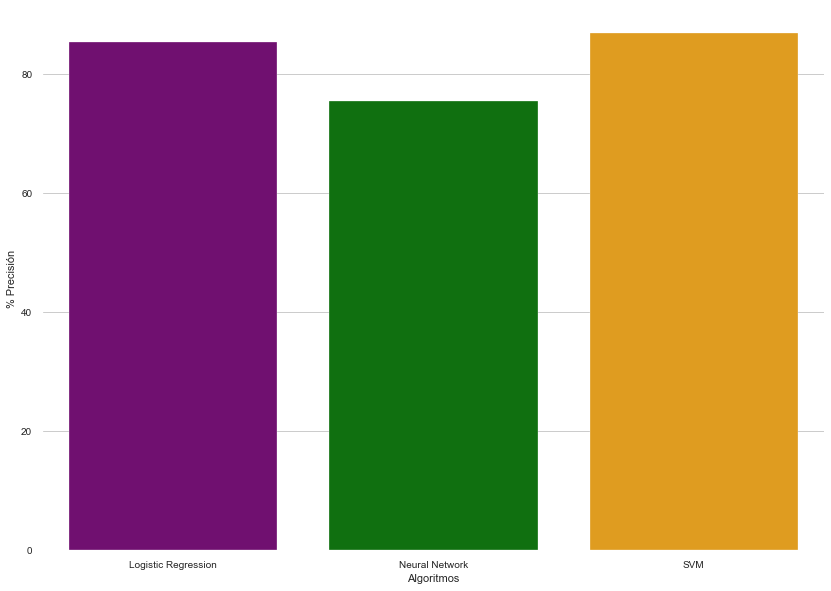

In [54]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
plt.ylabel("% Precisión")
plt.xlabel("Algoritmos")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()